In [90]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# eda

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [92]:
wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target


In [93]:
df.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [94]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [95]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

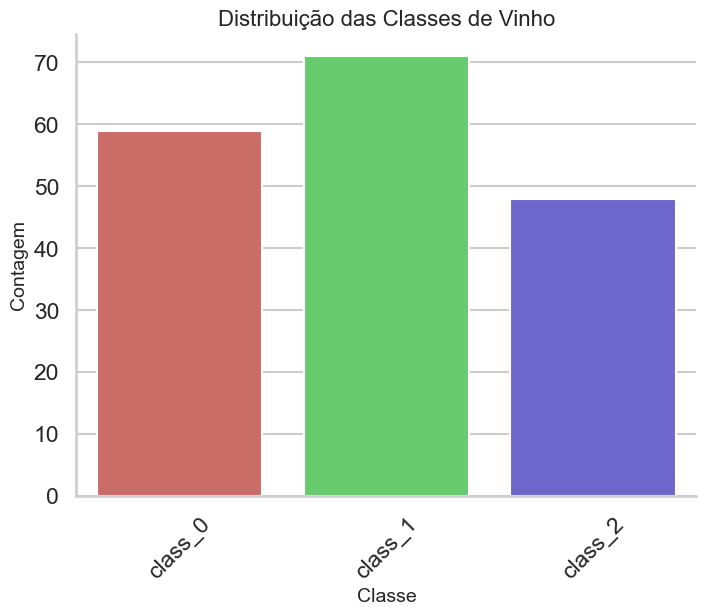

In [96]:
# Configurar o estilo e o contexto do gráfico
sns.set_style("whitegrid")
sns.set_context("talk")

# Criar a figura e o eixo do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Criar o gráfico de barras com uma paleta de cores personalizada
palette = sns.color_palette("hls", n_colors=len(wine_data.target_names))
sns.countplot(x='target', data=df, palette=palette, ax=ax)

# Definir rótulos e título
ax.set_xlabel('Classe', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_title('Distribuição das Classes de Vinho', fontsize=16)

# Personalizar os rótulos do eixo x
ax.set_xticklabels(wine_data.target_names, rotation=45)

# Remover a borda superior e a borda direita
sns.despine()

# Exibir o gráfico
plt.show()


[Text(0.5, 0, 'alcohol'),
 Text(1.5, 0, 'malic_acid'),
 Text(2.5, 0, 'ash'),
 Text(3.5, 0, 'alcalinity_of_ash'),
 Text(4.5, 0, 'magnesium'),
 Text(5.5, 0, 'total_phenols'),
 Text(6.5, 0, 'flavanoids'),
 Text(7.5, 0, 'nonflavanoid_phenols'),
 Text(8.5, 0, 'proanthocyanins'),
 Text(9.5, 0, 'color_intensity'),
 Text(10.5, 0, 'hue'),
 Text(11.5, 0, 'od280/od315_of_diluted_wines'),
 Text(12.5, 0, 'proline'),
 Text(13.5, 0, 'target')]

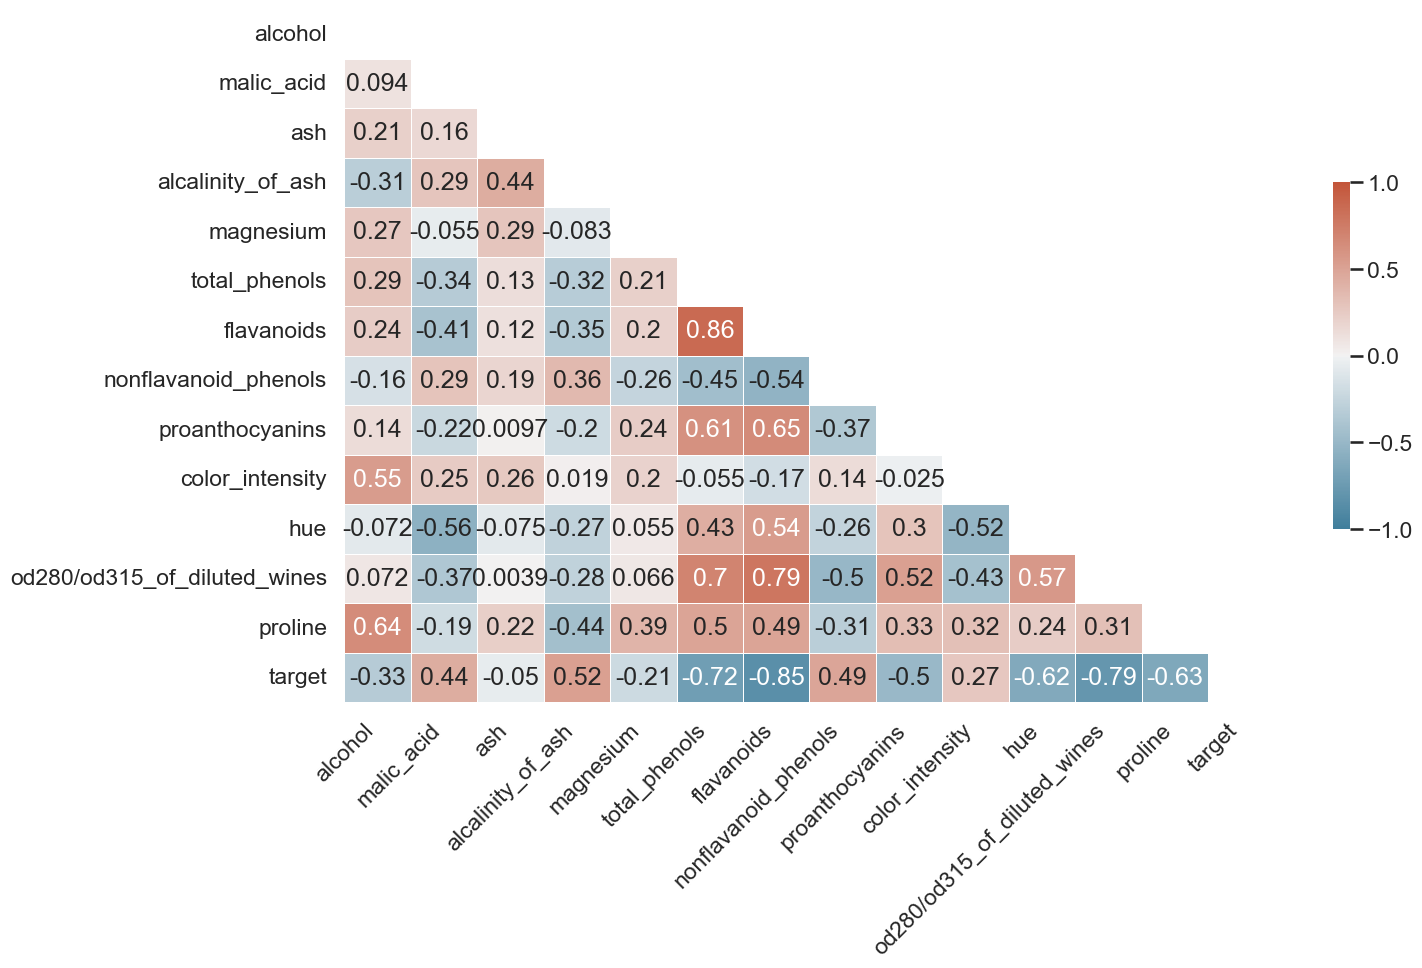

In [97]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (15, 9))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

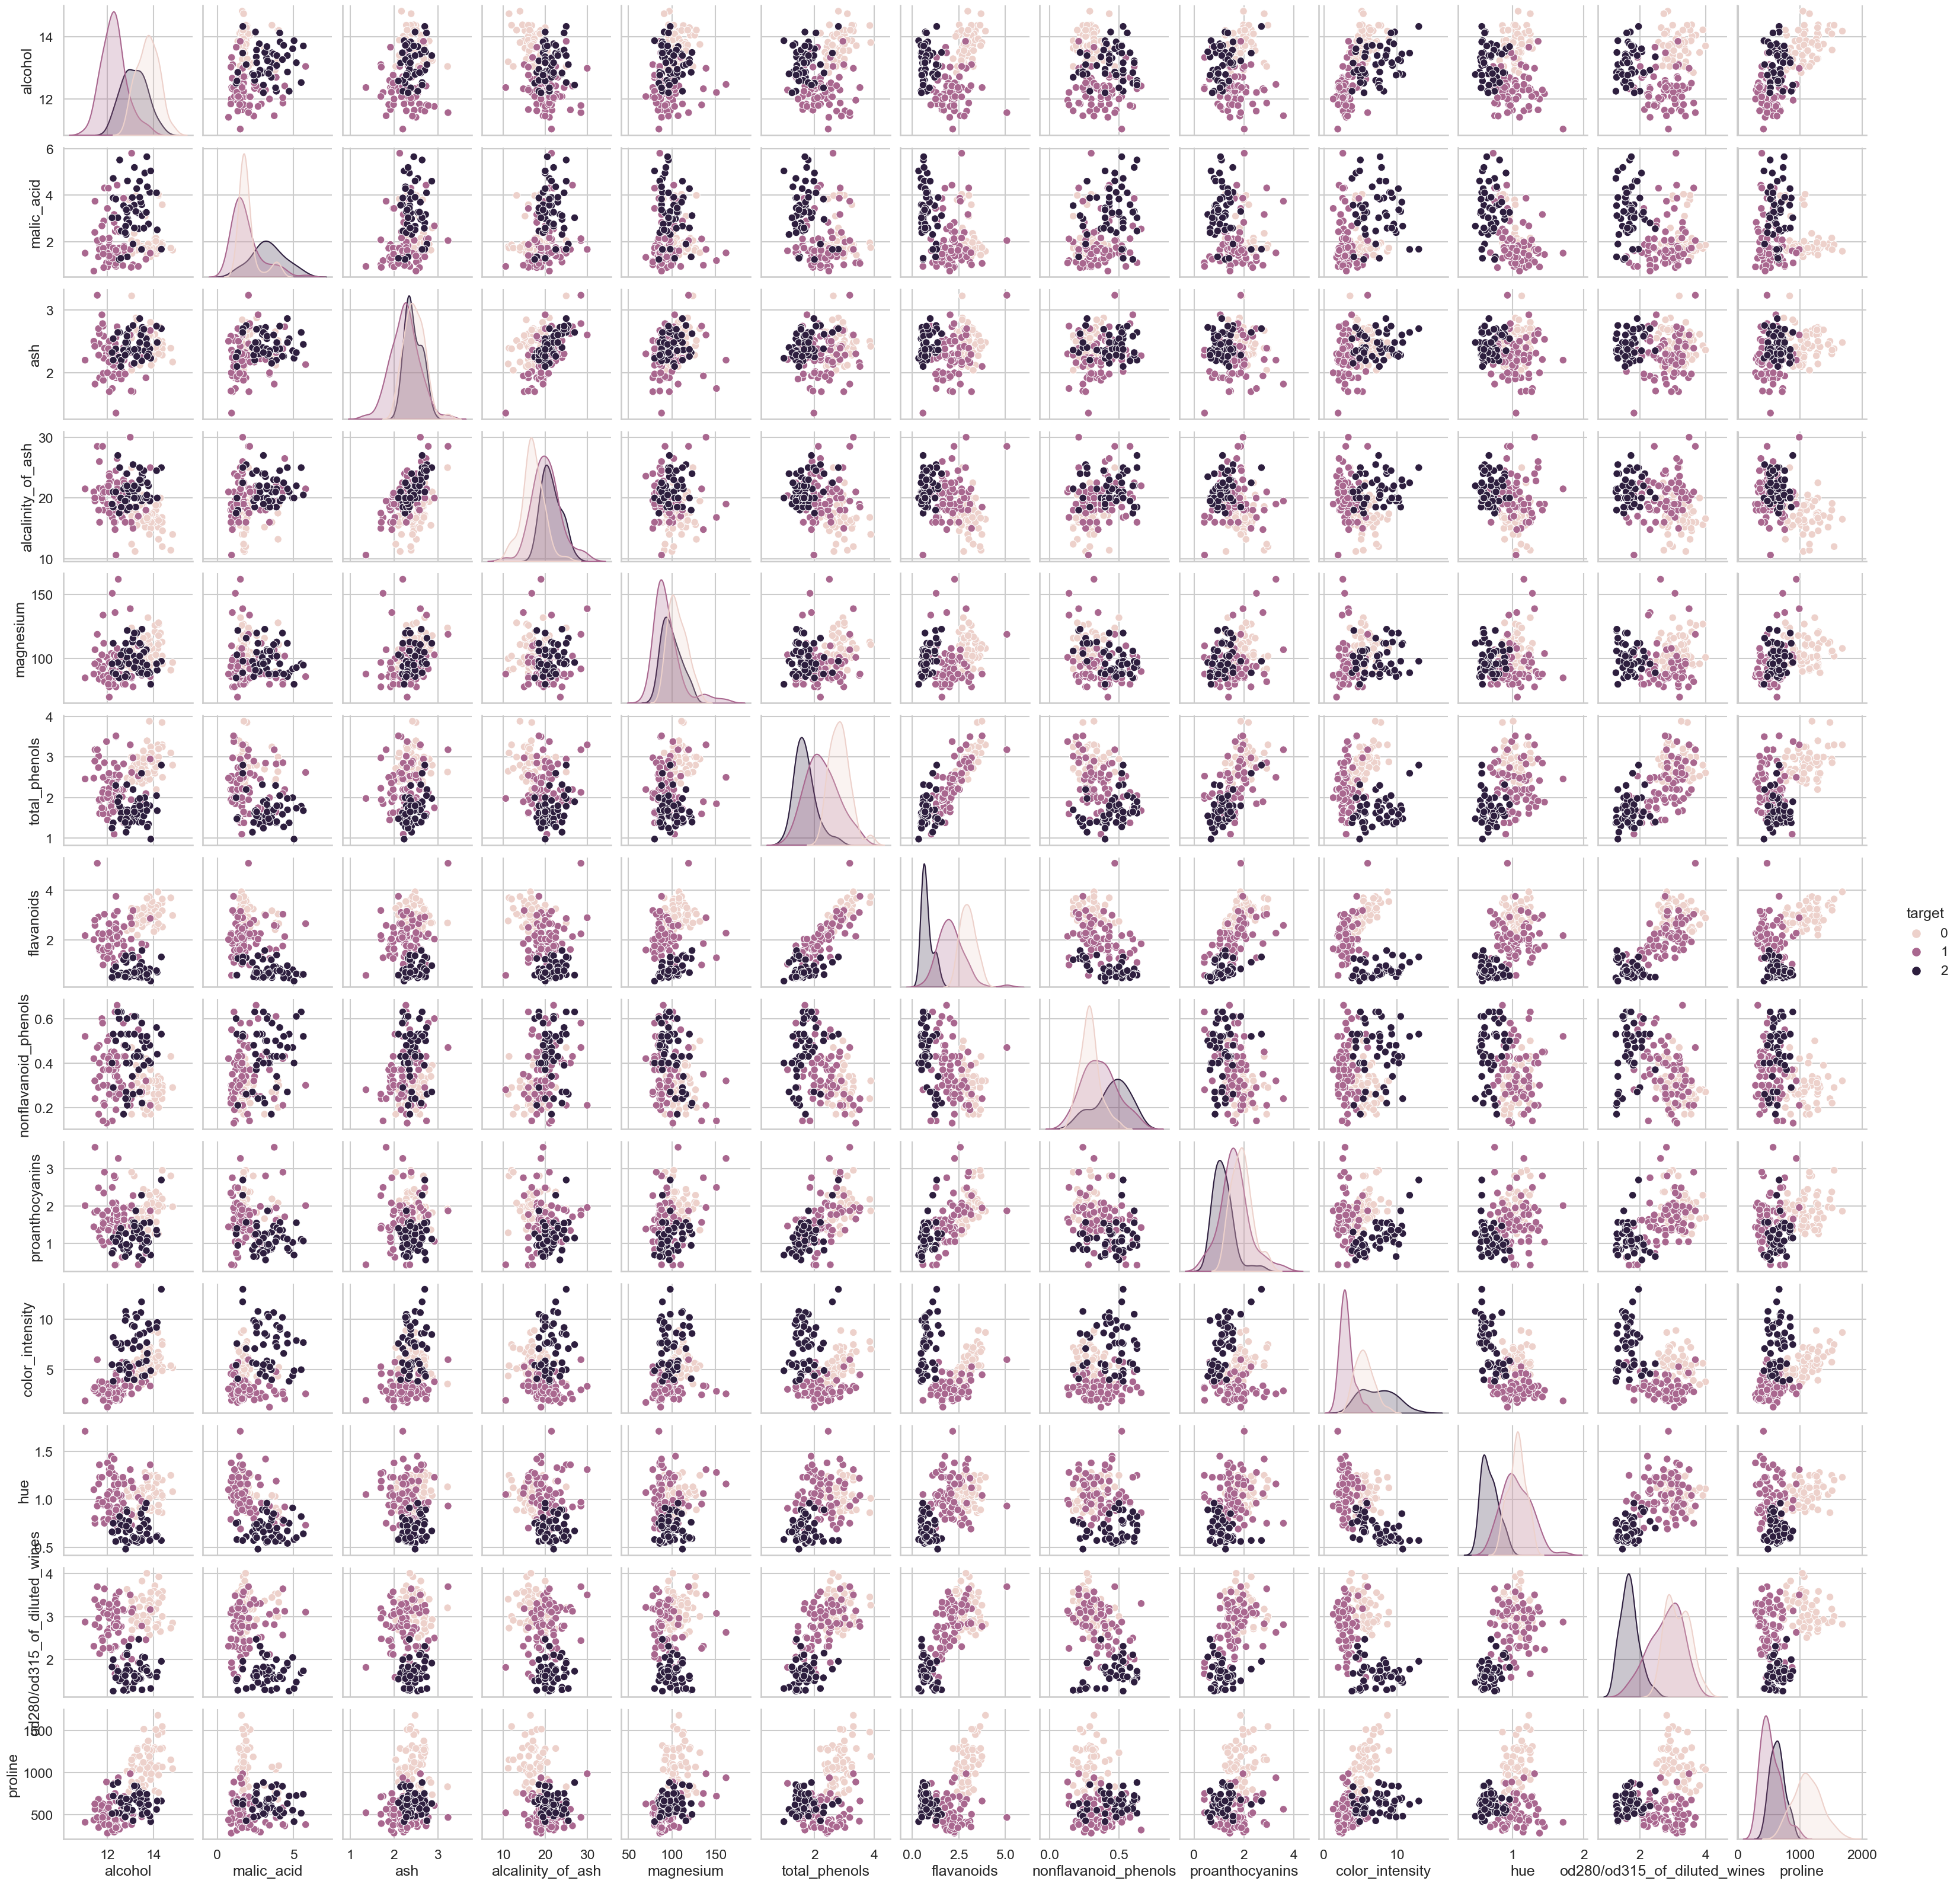

In [98]:
sns.pairplot(df, hue='target')
plt.show()


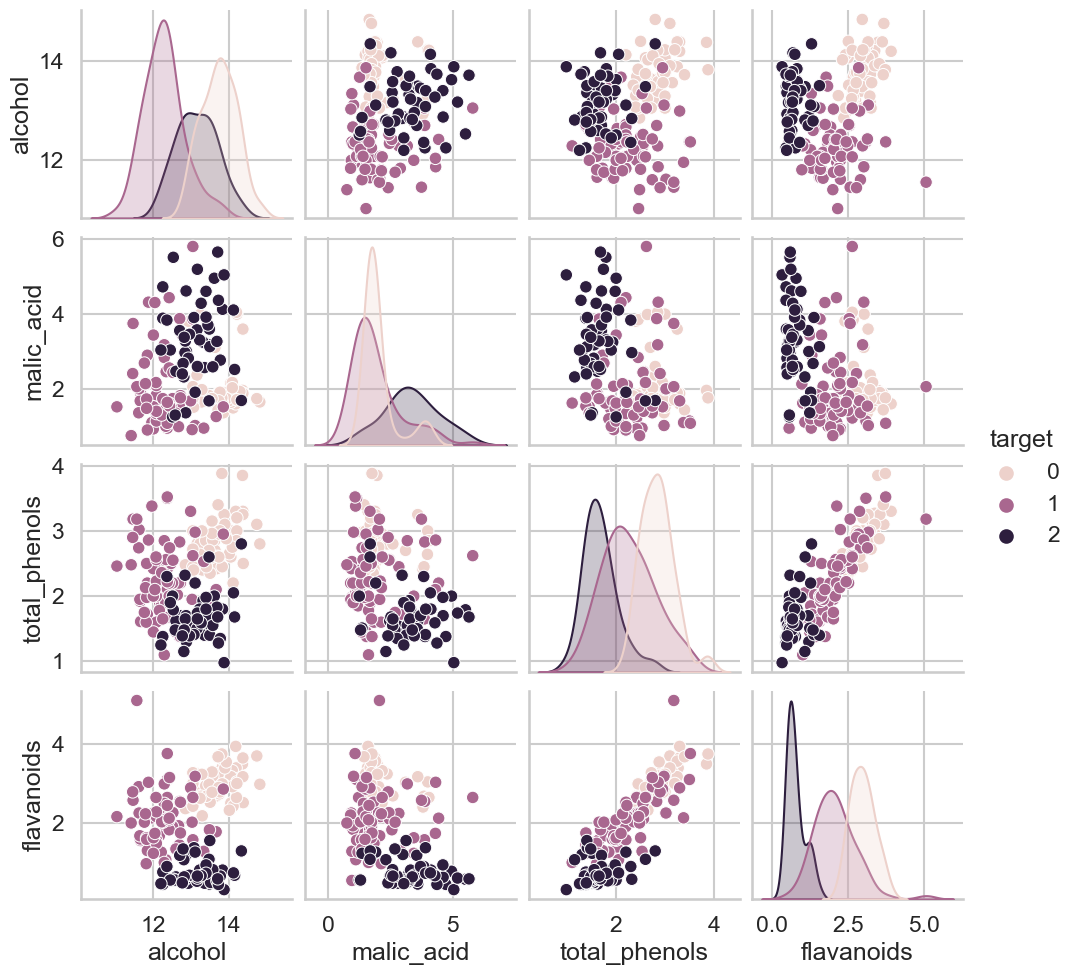

In [99]:
sns.pairplot(df, vars=['alcohol', 'malic_acid', 'total_phenols', 'flavanoids'], hue='target')
plt.show()


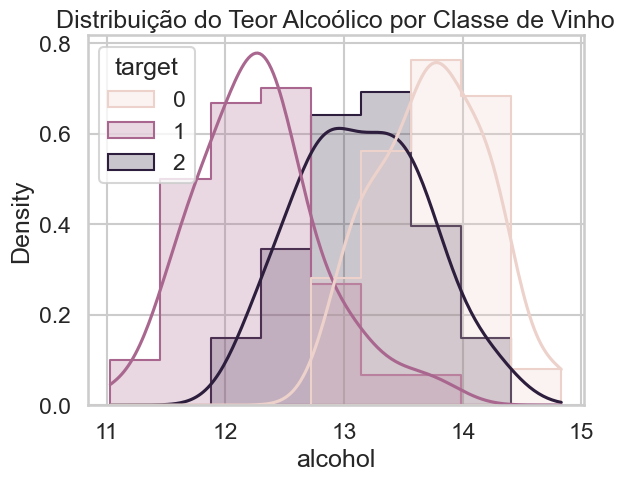

In [100]:
sns.histplot(df, x='alcohol', hue='target', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição do Teor Alcoólico por Classe de Vinho')
plt.show()


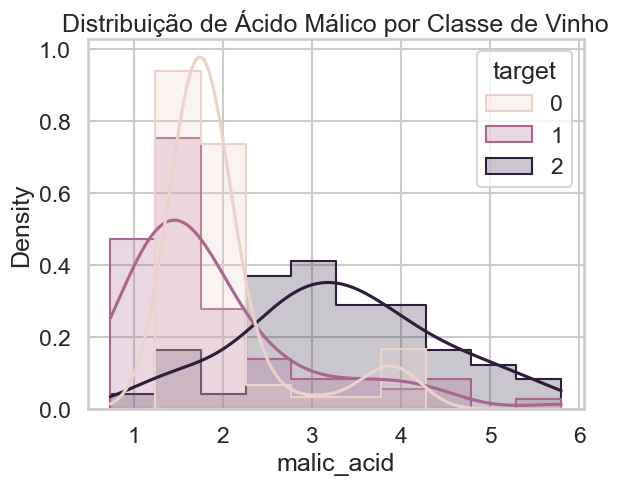

In [101]:

sns.histplot(df, x='malic_acid', hue='target', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição de Ácido Málico por Classe de Vinho')
plt.show()


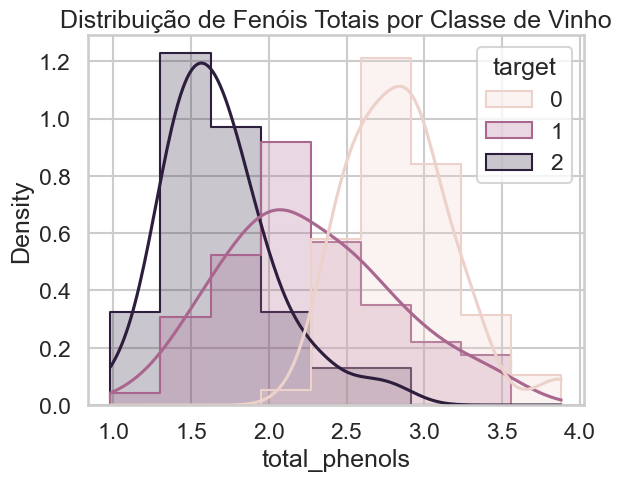

In [102]:
sns.histplot(df, x='total_phenols', hue='target', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição de Fenóis Totais por Classe de Vinho')
plt.show()



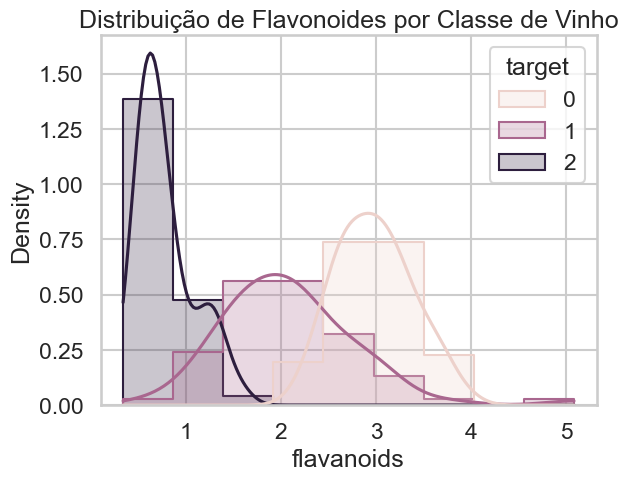

In [103]:

sns.histplot(df, x='flavanoids', hue='target', kde=True, element='step', stat='density', common_norm=False)
plt.title('Distribuição de Flavonoides por Classe de Vinho')
plt.show()

# lda

In [104]:
X = wine_data.data
y = wine_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [105]:
lda = LinearDiscriminantAnalysis()

# Defina os parâmetros a serem testados no GridSearchCV
param_grid = [
    {
        'solver': ['svd'],
        'shrinkage': [None],
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    },
    {
        'solver': ['lsqr'],
        'shrinkage': [None, 'auto'] + list(np.arange(0, 1.01, 0.1)),
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    },
    {
        'solver': ['eigen'],
        'shrinkage': [None, 'auto'] + list(np.arange(0, 1.01, 0.1)),
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    }
]

grid_search = GridSearchCV(lda, param_grid, scoring='accuracy', cv=5, n_jobs=-1)


In [106]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid=[{'shrinkage': [None], 'solver': ['svd'],
                          'tol': [1e-06, 1e-05, 0.0001, 0.001]},
                         {'shrinkage': [None, 'auto', 0.0, 0.1, 0.2,
                                        0.30000000000000004, 0.4, 0.5,
                                        0.6000000000000001, 0.7000000000000001,
                                        0.8, 0.9, 1.0],
                          'solver': ['lsqr'],
                          'tol': [1e-06, 1e-05, 0.0001, 0.001]},
                         {'shrinkage': [None, 'auto', 0.0, 0.1, 0.2,
                                        0.30000000000000004, 0.4, 0.5,
                                        0.6000000000000001, 0.7000000000000001,
                                        0.8, 0.9, 1.0],
                          'solver': ['eigen'],
                          'tol': [1e-06, 1e-05, 0.0001, 0.001]}],
             scoring='accuracy')

In [107]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)


Melhores parâmetros encontrados:
{'shrinkage': None, 'solver': 'svd', 'tol': 1e-06}


In [108]:
best_lda = grid_search.best_estimator_
y_pred = best_lda.predict(X_test)

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Matriz de confusão:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


In [109]:
# Insira os valores das características manualmente
# Exemplo: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, 
#           total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, 
#           hue, od280/od315_of_diluted_wines, proline]

sample = np.array([[13.05, 1.65, 2.55, 18.0, 98.0, 
                    2.45, 2.43, 0.29, 1.44, 4.25, 
                    1.12, 2.51, 1105]])

# Utilize o modelo best_lda para prever a classe do vinho
predicted_class = best_lda.predict(sample)

print(f"A classe prevista para a amostra inserida é: {predicted_class[0]}")


A classe prevista para a amostra inserida é: 0


# numero de features

Melhores parâmetros encontrados:
{'shrinkage': None, 'solver': 'svd', 'tol': 1e-06}
Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Matriz de confusão:
[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
O melhor valor de k é: 13


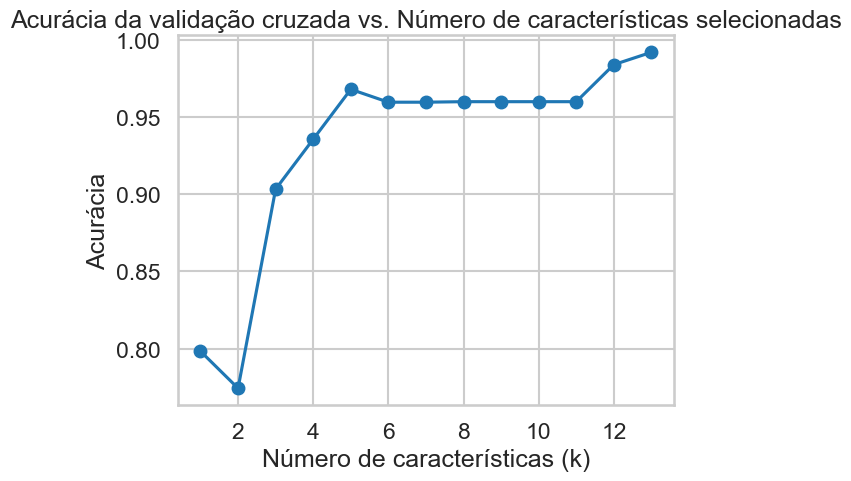

Relatório de classificação (conjunto de teste):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [111]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_wine
import numpy as np
import matplotlib.pyplot as plt

# Carregue o conjunto de dados wine
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# LDA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lda = LinearDiscriminantAnalysis()

# Defina os parâmetros a serem testados no GridSearchCV
param_grid = [
    {
        'solver': ['svd'],
        'shrinkage': [None],
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    },
    {
        'solver': ['lsqr'],
        'shrinkage': [None, 'auto'] + list(np.arange(0, 1.01, 0.1)),
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    },
    {
        'solver': ['eigen'],
        'shrinkage': [None, 'auto'] + list(np.arange(0, 1.01, 0.1)),
        'tol': [1e-6, 1e-5, 1e-4, 1e-3]
    }
]

grid_search = GridSearchCV(lda, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)
best_lda = grid_search.best_estimator_
y_pred = best_lda.predict(X_test)

print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

# Defina o intervalo de valores de k para testar
k_values = range(1, len(wine_data.feature_names) + 1)

# Armazene os resultados da validação cruzada
cv_scores = []

# Teste diferentes valores de k
for k in k_values:
    # Aplique a seleção de recursos
    selector = SelectKBest(score_func=f_classif, k=k)
    X_selected = selector.fit_transform(X_train, y_train)

    # Crie um pipeline com a seleção de recursos, lda e um classificador
    model = LogisticRegression(solver='liblinear')
    pipeline = Pipeline([('selector', selector), ('lda', best_lda), ('classifier', model)])

    # Calcule a pontuação de validação cruzada para o modelo atual
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(score)

# Identifique o melhor valor de k
best_k = k_values[np.argmax(cv_scores)]
print(f'O melhor valor de k é: {best_k}')

# Plote a pontuação de validação cruzada em função de k
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de características (k)')
plt.ylabel('Acurácia')
plt.title('Acurácia da validação cruzada vs. Número de características selecionadas')
plt.show()

# Crie um novo seletor com o número ótimo de características
selector = SelectKBest(score_func=f_classif, k=best_k)
X_selected_train = selector.fit_transform(X_train, y_train)
X_selected_test = selector.transform(X_test)

# Treine o modelo final usando o conjunto de treinamento completo
pipeline = Pipeline([('selector', selector), ('lda', best_lda), ('classifier', model)])
pipeline.fit(X_train, y_train)

# Avalie o modelo final usando o conjunto de teste
y_pred = pipeline.predict(X_test)
print('Relatório de classificação (conjunto de teste):')
print(classification_report(y_test, y_pred))

plt.show()


In [112]:
# Carregue o conjunto de dados wine
wine_data = load_wine()
X, y = wine_data.data, wine_data.target

# Escolha o número de melhores características para selecionar
k = 5

# Aplique a seleção de recursos univariada usando teste F ANOVA
selector = SelectKBest(score_func=f_classif, k=k)
X_selected = selector.fit_transform(X, y)

# Mostre os índices das características selecionadas
selected_features_idx = selector.get_support(indices=True)
print("Índices das características selecionadas:")
print(selected_features_idx)

# Mostre os nomes das características selecionadas
selected_features_names = np.array(wine_data.feature_names)[selected_features_idx]
print("Nomes das características selecionadas:")
print(selected_features_names)


Índices das características selecionadas:
[ 0  6  9 11 12]
Nomes das características selecionadas:
['alcohol' 'flavanoids' 'color_intensity' 'od280/od315_of_diluted_wines'
 'proline']


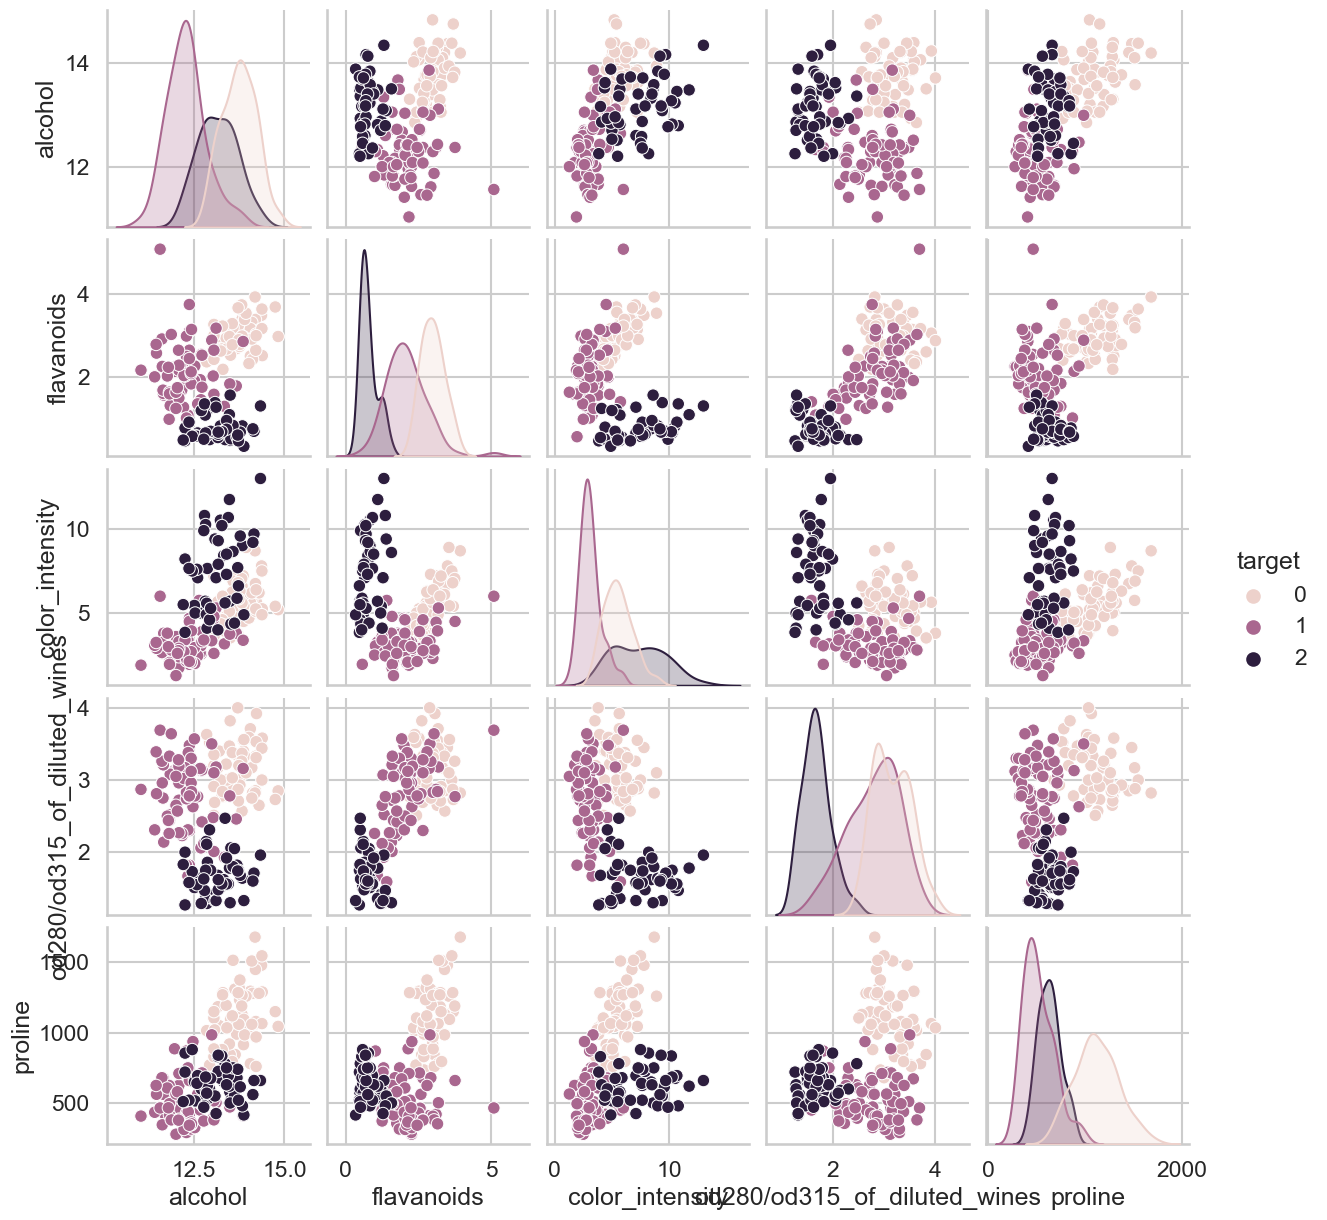

In [113]:
sns.pairplot(df, vars=['alcohol', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline'], hue='target')
plt.show()
